In [12]:
import pandas as pd
import gzip

# Load the filtered_ID1.csv file to get the list of IDs
filtered_ids_df = pd.read_csv('/uoa/home/t05cj23/sharedscratch/main/filtered SNV/filtered_ID1.csv')

# Display the dataframe
filtered_ids_df.head(), filtered_ids_df.shape

(     chr       pos Ref_allele Alt_allele  Depth_total  Depth_ref  Depth_alt  \
 0  chr20  59035004          C          A           45         33         12   
 
    SVM_pos_score  LDrefine_twoLoci_score  LDrefine_trioLoci_score  \
 0       0.520098                     NaN                      NaN   
 
    LDrefine_merged_score   BAF_alt  
 0                    NaN  0.266667  ,
 (1, 12))

In [13]:
# Load the chr20.gl.filter.hc.cell.mat.gz file
with gzip.open('/uoa/home/t05cj23/sharedscratch/main/output/ID1/somatic/chr20.gl.filter.hc.cell.mat.gz', 'rt') as f:
    chr20_df = pd.read_csv(f, sep='\t', header=None)

# Rename the first four columns
chr20_df.rename(columns={0: "chr", 1: "pos", 2: "ref_ale", 3: "alt_ale"}, inplace=True)

# Display the first few rows of the dataframe
chr20_df.head()

/tmp/ipykernel_4079307/3050447948.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  chr20_df = pd.read_csv(f, sep='\t', header=None)


,chr,pos,ref_ale,alt_ale,4,5,6,7,8,9,...,5951,5952,5953,5954,5955,5956,5957,5958,5959,5960
0,chr20,297191,C,T,15,1.0,7.0,0.0,7.0,1|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,chr20,328717,G,A,14,1.0,9.0,0.0,4.0,1|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,chr20,430675,C,T,45,39.0,0.0,6.0,0.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
3,chr20,430911,C,T,301,260.0,0.0,39.0,0.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0
4,chr20,430935,A,C,286,184.0,0.0,6.0,0.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [14]:
# Extract the 'chr' and 'pos' columns from the filtered_ids_df
filtered_chr = filtered_ids_df['chr'].iloc[0]
filtered_pos = filtered_ids_df['pos'].iloc[0]

# Filter the chr20_df based on the 'chr' and 'pos' columns
filtered_chr20_df = chr20_df[(chr20_df['chr'] == filtered_chr) & (chr20_df['pos'] == filtered_pos)]

# Display the filtered dataframe
filtered_chr20_df

,chr,pos,ref_ale,alt_ale,4,5,6,7,8,9,...,5951,5952,5953,5954,5955,5956,5957,5958,5959,5960
1253,chr20,59035004,C,A,92,0.0,69.0,0.0,23.0,NaN,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [15]:
# Define the order of columns: 1-4, 19-20, and then the rest
columns_to_display = list(filtered_chr20_df.columns[:4])+list(filtered_chr20_df.columns[18:])

# Reorder the dataframe based on the new column order
reordered_df = filtered_chr20_df[columns_to_display]

# Display the reordered dataframe
display(reordered_df)

#Read the file to replace the column header with single-cell sequences
cell_seq_file = pd.read_csv("/uoa/home/t05cj23/sharedscratch/main/output/ID1/somatic/chr20.cell_snv.cellID.filter.csv", usecols=['cell'])

#Transpose the rows to columns
cell_seq = cell_seq_file.T

#Display the single-cell sequences
display(cell_seq)

,chr,pos,ref_ale,alt_ale,18,19,20,21,22,23,...,5951,5952,5953,5954,5955,5956,5957,5958,5959,5960
1253,chr20,59035004,C,A,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


,0,1,2,3,4,5,6,7,8,9,...,5933,5934,5935,5936,5937,5938,5939,5940,5941,5942
cell,CCACGGAAGGCACATG-1,CCAGCGATCTGCGACG-1,CCAGCGACAGGATCGA-1,CCAGCGAAGTTTGCGT-1,CATTATCTCAAGAAGT-1,CATGCCTAGTGTACTC-1,CCGTTCATCACTCTTA-1,CCGGTAGTCGATCCCT-1,CCCTCCTGTGTTGAGG-1,CACCTTGAGTCGTTTG-1,...,TGCCCTACAGGTTTCA-1,TGCCCTACAATACGCT-1,TGCCCATAGGCTAGAC-1,TGCCCATTCACTCCTG-1,TGCCCATTCACCGTAA-1,TGCCCATCAGTAGAGC-1,TGCCCATCAGCGTTCG-1,TGCCCATCAGCGAACA-1,TGCCCATAGTTCGCAT-1,TGCCCTACAGGTCTCG-1


In [16]:
# Extract the headers from the transposed cell sequence dataframe
new_headers = cell_seq.iloc[0, :].tolist()

# Create new column names for reordered_df starting from the 6th column onward
new_column_names = list(reordered_df.columns[:4]) + new_headers

# Check if the lengths match
if len(new_column_names) == len(reordered_df.columns):
    # Rename the columns in reordered_df
    reordered_df.columns = new_column_names
    # Display the reordered dataframe with the new column names
    display(reordered_df.head())

,chr,pos,ref_ale,alt_ale,CCACGGAAGGCACATG-1,CCAGCGATCTGCGACG-1,CCAGCGACAGGATCGA-1,CCAGCGAAGTTTGCGT-1,CATTATCTCAAGAAGT-1,CATGCCTAGTGTACTC-1,...,TGCCCTACAGGTTTCA-1,TGCCCTACAATACGCT-1,TGCCCATAGGCTAGAC-1,TGCCCATTCACTCCTG-1,TGCCCATTCACCGTAA-1,TGCCCATCAGTAGAGC-1,TGCCCATCAGCGTTCG-1,TGCCCATCAGCGAACA-1,TGCCCATAGTTCGCAT-1,TGCCCTACAGGTCTCG-1
1253,chr20,59035004,C,A,0/0,0/0,0/0,0/0,0/0,0/0,...,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0,0/0


In [17]:
#Categorize Mutation Types

# Function to classify mutation status
def mutation(value):
    if value == '0/0':
        return '0'
    elif value in ['1/0', '0/1', '1/1']:
        return '1'
    else:
        return value 

# Apply the function to all columns in the reordered dataframe
mutation_df = reordered_df.map(mutation)

# Display the dataframe
print(mutation_df)

        chr       pos ref_ale alt_ale CCACGGAAGGCACATG-1 CCAGCGATCTGCGACG-1  \
1253  chr20  59035004       C       A        no mutation        no mutation   

     CCAGCGACAGGATCGA-1 CCAGCGAAGTTTGCGT-1 CATTATCTCAAGAAGT-1  \
1253        no mutation        no mutation        no mutation   

     CATGCCTAGTGTACTC-1  ... TGCCCTACAGGTTTCA-1 TGCCCTACAATACGCT-1  \
1253        no mutation  ...        no mutation        no mutation   

     TGCCCATAGGCTAGAC-1 TGCCCATTCACTCCTG-1 TGCCCATTCACCGTAA-1  \
1253        no mutation        no mutation        no mutation   

     TGCCCATCAGTAGAGC-1 TGCCCATCAGCGTTCG-1 TGCCCATCAGCGAACA-1  \
1253        no mutation        no mutation        no mutation   

     TGCCCATAGTTCGCAT-1 TGCCCTACAGGTCTCG-1  
1253        no mutation        no mutation  

[1 rows x 5947 columns]


In [18]:
# Number of Cells with this particular Mutation

# Create a new column indicating the number of mutations in each row
mutation_df['mutation_count'] = mutation_df.apply(lambda row: sum(1 for val in row if val == '1'), axis=1)

final_df = mutation_df

# Display the final dataframe
print(final_df)

        chr       pos ref_ale alt_ale CCACGGAAGGCACATG-1 CCAGCGATCTGCGACG-1  \
1253  chr20  59035004       C       A        no mutation        no mutation   

     CCAGCGACAGGATCGA-1 CCAGCGAAGTTTGCGT-1 CATTATCTCAAGAAGT-1  \
1253        no mutation        no mutation        no mutation   

     CATGCCTAGTGTACTC-1  ... TGCCCTACAATACGCT-1 TGCCCATAGGCTAGAC-1  \
1253        no mutation  ...        no mutation        no mutation   

     TGCCCATTCACTCCTG-1 TGCCCATTCACCGTAA-1 TGCCCATCAGTAGAGC-1  \
1253        no mutation        no mutation        no mutation   

     TGCCCATCAGCGTTCG-1 TGCCCATCAGCGAACA-1 TGCCCATAGTTCGCAT-1  \
1253        no mutation        no mutation        no mutation   

     TGCCCTACAGGTCTCG-1 mutation_count  
1253        no mutation             45  

[1 rows x 5948 columns]


In [19]:
# Create a column with information of col 1-4 is merged to one

def generate_names(df):
    df['snvID'] = df['snvID'] = df.apply(lambda row: f"{row[0]}:{row[1]}:{row[2]}:{row[3]}", axis=1)
    return df

snv_id_set = generate_names(final_df)

print(snv_id_set)

        chr       pos ref_ale alt_ale CCACGGAAGGCACATG-1 CCAGCGATCTGCGACG-1  \
1253  chr20  59035004       C       A        no mutation        no mutation   

     CCAGCGACAGGATCGA-1 CCAGCGAAGTTTGCGT-1 CATTATCTCAAGAAGT-1  \
1253        no mutation        no mutation        no mutation   

     CATGCCTAGTGTACTC-1  ... TGCCCATAGGCTAGAC-1 TGCCCATTCACTCCTG-1  \
1253        no mutation  ...        no mutation        no mutation   

     TGCCCATTCACCGTAA-1 TGCCCATCAGTAGAGC-1 TGCCCATCAGCGTTCG-1  \
1253        no mutation        no mutation        no mutation   

     TGCCCATCAGCGAACA-1 TGCCCATAGTTCGCAT-1 TGCCCTACAGGTCTCG-1 mutation_count  \
1253        no mutation        no mutation        no mutation             45   

                   snvID  
1253  chr20:59035004:C:A  

[1 rows x 5949 columns]


/tmp/ipykernel_4079307/1131646160.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['snvID'] = df['snvID'] = df.apply(lambda row: f"{row[0]}:{row[1]}:{row[2]}:{row[3]}", axis=1)


In [20]:
#No of cells having particular mutations

# Identify columns with 'mutation' values
mutation_columns = mutation_df.columns[mutation_df.eq('1').any()]

# Convert the index object to a list
mutation_columns_list = mutation_columns.tolist()

# Create a new dataframe from the list
cell_mut_df = pd.DataFrame(mutation_columns_list, columns=['Mutation_Columns'])

# Display the new dataframe
print(cell_mut_df)

      Mutation_Columns
0   GGACAGATCCTGCTTG-1
1   TTAGTTCAGGATGGAA-1
2   GGATGTTTCAGTTCGA-1
3   AAGGCAGCACCTGGTG-1
4   CTCATTAAGCATGGCA-1
5   CAACTAGTCACCCGAG-1
6   CTCATTACATGGATGG-1
7   AGACGTTAGGGCTCTC-1
8   GGAACTTGTTTAGCTG-1
9   CATATTCTCGAATCCA-1
10  ACACCAAAGAGGTAGA-1
11  TAGGCATTCGCAGGCT-1
12  GCAGCCAGTAGAGGAA-1
13  GCATGTATCAACGAAA-1
14  GGGTTGCCAAGTCTGT-1
15  GGACAAGCACCTATCC-1
16  GGACAGACACATGGGA-1
17  TACAGTGTCACCGGGT-1
18  TCACGAATCAGTTGAC-1
19  GTCGTAAAGCTAACAA-1
20  GTCGGGTGTGTTCTTT-1
21  GTAGGCCAGGGTCTCC-1
22  ATCCGAACAACTGCTA-1
23  ATCATCTTCTAACCGA-1
24  ATCATGGGTATATGAG-1
25  AGGTCATAGCAAATCA-1
26  AGGTCCGCAAACAACA-1
27  AGGGAGTGTATAGGTA-1
28  CATATTCCAGACACTT-1
29  ACTGTCCTCTACTCAT-1
30  AACTCCCCAGACACTT-1
31  AAGGAGCAGTTTGCGT-1
32  AACTTTCCACATAACC-1
33  AAGGCAGGTCGGCACT-1
34  AAGGTTCTCGGAGCAA-1
35  ACACTGATCCACGTGG-1
36  ACACCCTGTGAGCGAT-1
37  CTCGGGACATTCTCAT-1
38  GATGCTACAGCTTAAC-1
39  GAATGAAGTTGCGTTA-1
40  CCTATTAAGAGCCTAG-1
41  CGTGAGCCAAGCGTAG-1
42  CTAACTT

In [21]:
#Extract the sequence and get info from Randolph metadata

# Load Randolph metadata TSV file
import re
randolph_metadata = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/Randolph_singlecell_metadata.tsv', sep='\t')

# Extract sequence from cell_mut_df
cell_mut_df['Extracted_CellID'] = cell_mut_df['Mutation_Columns'].apply(lambda x: re.match(r'([^-\d]+)', x).group(1))

# Extract sequence from randolph_metadata
randolph_metadata['Extracted_CellID'] = randolph_metadata['CellID'].apply(lambda x: re.search(r'_([^_]+)$', x).group(1))

# Merge the DataFrames on the extracted cell IDs
merged_df = pd.merge(cell_mut_df, randolph_metadata, on='Extracted_CellID', how='left')

display(merged_df[['Extracted_CellID', 'celltype', 'Batch']])


,Extracted_CellID,celltype,Batch
0,GGACAGATCCTGCTTG,CD4_T,B1_c1
1,GGACAGATCCTGCTTG,CD4_T,B12_c2
2,TTAGTTCAGGATGGAA,CD8_T,B11_c1
3,GGATGTTTCAGTTCGA,highly_infected,B1_c1
4,GGATGTTTCAGTTCGA,CD8_T,B9_c2
5,AAGGCAGCACCTGGTG,CD8_T,B9_c2
6,CTCATTAAGCATGGCA,monocytes,B9_c2
7,CAACTAGTCACCCGAG,CD8_T,B9_c1
8,CTCATTACATGGATGG,CD4_T,B7_c1
9,AGACGTTAGGGCTCTC,CD8_T,B4_c1


In [22]:
# Filter the results to the batch ID for the partiular dataset

# ID1 = SRR13194368 = B1_c1 [batch ID data retrieved from sra metadata file]

# Define the batch identifier to filter by
batch_to_filter = 'B1_c1'

# Filter the DataFrame for the specific batch identifier
filtered_df = merged_df[merged_df['Batch'] == batch_to_filter]
count_rows = len(filtered_df)

# Display the filtered DataFrame
print(f'Total number of cells with this mutation = {count_rows}')
display(filtered_df)


Total number of cells with this mutation = 38


,Mutation_Columns,Extracted_CellID,CellID,celltype,Batch,sample_condition,SOC_indiv_ID,SOC_infection_status,SOC_genetic_ancestry,CEU,YRI
0,GGACAGATCCTGCTTG-1,GGACAGATCCTGCTTG,B1_c1_GGACAGATCCTGCTTG,CD4_T,B1_c1,HMN83553_flu,HMN83553,flu,EUR,0.999990,0.000010
3,GGATGTTTCAGTTCGA-1,GGATGTTTCAGTTCGA,B1_c1_GGATGTTTCAGTTCGA,highly_infected,B1_c1,HMN83559_flu,HMN83559,flu,AFR,0.091008,0.908992
10,GGAACTTGTTTAGCTG-1,GGAACTTGTTTAGCTG,B1_c1_GGAACTTGTTTAGCTG,CD4_T,B1_c1,HMN83559_flu,HMN83559,flu,AFR,0.091008,0.908992
13,ACACCAAAGAGGTAGA-1,ACACCAAAGAGGTAGA,B1_c1_ACACCAAAGAGGTAGA,monocytes,B1_c1,HMN83559_flu,HMN83559,flu,AFR,0.091008,0.908992
15,TAGGCATTCGCAGGCT-1,TAGGCATTCGCAGGCT,B1_c1_TAGGCATTCGCAGGCT,CD4_T,B1_c1,HMN83559_flu,HMN83559,flu,AFR,0.091008,0.908992
17,GCAGCCAGTAGAGGAA-1,GCAGCCAGTAGAGGAA,B1_c1_GCAGCCAGTAGAGGAA,CD4_T,B1_c1,HMN83554_flu,HMN83554,flu,EUR,0.999990,0.000010
18,GCATGTATCAACGAAA-1,GCATGTATCAACGAAA,B1_c1_GCATGTATCAACGAAA,CD8_T,B1_c1,HMN83553_flu,HMN83553,flu,EUR,0.999990,0.000010
19,GGGTTGCCAAGTCTGT-1,GGGTTGCCAAGTCTGT,B1_c1_GGGTTGCCAAGTCTGT,CD4_T,B1_c1,HMN83553_flu,HMN83553,flu,EUR,0.999990,0.000010
20,GGACAAGCACCTATCC-1,GGACAAGCACCTATCC,B1_c1_GGACAAGCACCTATCC,monocytes,B1_c1,HMN83554_flu,HMN83554,flu,EUR,0.999990,0.000010
21,GGACAGACACATGGGA-1,GGACAGACACATGGGA,B1_c1_GGACAGACACATGGGA,B,B1_c1,HMN83553_flu,HMN83553,flu,EUR,0.999990,0.000010


In [23]:
#Cell Type Count for Mutated 

# Create DataFrame
df = pd.DataFrame(filtered_df)

# Group by SOC_indiv_ID and then count occurrences of each cell type within each group
cell_type_counts = df.groupby('SOC_indiv_ID')['celltype'].value_counts()

# List unique cell types
unique_cell_types = df['celltype'].unique()

# Display results
print("Cell Type Counts by SOC_indiv_ID:")
print(cell_type_counts)

Cell Type Counts by SOC_indiv_ID:
SOC_indiv_ID  celltype          
HMN83553      CD4_T                 11
              CD8_T                  3
              B                      1
HMN83554      CD8_T                  4
              CD4_T                  2
              infected_monocytes     1
              monocytes              1
HMN83559      CD4_T                  7
              monocytes              3
              B                      2
              CD8_T                  1
              NK                     1
              highly_infected        1
Name: count, dtype: int64


In [24]:
# Retrieve age from donor metadata

# Read the donor metadata file
donor_metadata_df = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/donor_metadata_with_batchid.csv')

#Selecting the required columns
donor_age_df = donor_metadata_df[['indiv_ID', 'batchID', 'age']]
# Merge the DataFrames
result_df = pd.merge(filtered_df, donor_age_df, left_on=['SOC_indiv_ID', 'Batch'], right_on=['indiv_ID', 'batchID'], how='left')

# Display the result
count_rows = len(result_df)
print(f'No. of Rows = {count_rows}')
display(result_df[['Extracted_CellID', 'SOC_indiv_ID','celltype', 'Batch', 'age', 'SOC_infection_status']])

No. of Rows = 38


,Extracted_CellID,SOC_indiv_ID,celltype,Batch,age,SOC_infection_status
0,GGACAGATCCTGCTTG,HMN83553,CD4_T,B1_c1,53,flu
1,GGATGTTTCAGTTCGA,HMN83559,highly_infected,B1_c1,47,flu
2,GGAACTTGTTTAGCTG,HMN83559,CD4_T,B1_c1,47,flu
3,ACACCAAAGAGGTAGA,HMN83559,monocytes,B1_c1,47,flu
4,TAGGCATTCGCAGGCT,HMN83559,CD4_T,B1_c1,47,flu
5,GCAGCCAGTAGAGGAA,HMN83554,CD4_T,B1_c1,41,flu
6,GCATGTATCAACGAAA,HMN83553,CD8_T,B1_c1,53,flu
7,GGGTTGCCAAGTCTGT,HMN83553,CD4_T,B1_c1,53,flu
8,GGACAAGCACCTATCC,HMN83554,monocytes,B1_c1,41,flu
9,GGACAGACACATGGGA,HMN83553,B,B1_c1,53,flu


In [25]:
#For check total cells present in the sample

# Extract column headers
headers = mutation_df.columns.tolist()

# Slice headers after the 4th column
headers_after_4th = headers[4:5947]

total_cells_list = [{'Column': header} for header in headers_after_4th]
cell_total_df = pd.DataFrame(total_cells_list)

# Display the new DataFrame
count_rows = len(cell_total_df)
print(f'Total number of columns after the 4th column = {count_rows}')

# Load Randolph metadata TSV file
randolph_metadata = pd.read_csv('/uoa/home/t05cj23/sharedscratch/git/Randolph_singlecell_metadata.tsv', sep='\t')

# Extract sequence from cell_mut_df
cell_total_df['Extracted_CellID'] = cell_total_df['Column'].apply(lambda x: re.match(r'([^-\d]+)', x).group(1))

# Extract sequence from randolph_metadata
randolph_metadata['Extracted_CellID'] = randolph_metadata['CellID'].apply(lambda x: re.search(r'_([^_]+)$', x).group(1))

# Merge the DataFrames on the extracted cell IDs
merged_total_df = pd.merge(cell_total_df, randolph_metadata, on='Extracted_CellID', how='left')

count_rows = len(merged_total_df)
print(f'Total number of cells = {count_rows}')
print(merged_total_df)

Total number of columns after the 4th column = 5943


Total number of cells = 6716
                  Column  Extracted_CellID                   CellID  \
0     CCACGGAAGGCACATG-1  CCACGGAAGGCACATG   B1_c1_CCACGGAAGGCACATG   
1     CCACGGAAGGCACATG-1  CCACGGAAGGCACATG  B15_c2_CCACGGAAGGCACATG   
2     CCAGCGATCTGCGACG-1  CCAGCGATCTGCGACG  B15_c2_CCAGCGATCTGCGACG   
3     CCAGCGACAGGATCGA-1  CCAGCGACAGGATCGA  B15_c2_CCAGCGACAGGATCGA   
4     CCAGCGAAGTTTGCGT-1  CCAGCGAAGTTTGCGT  B11_c1_CCAGCGAAGTTTGCGT   
...                  ...               ...                      ...   
6711  TGCCCATCAGTAGAGC-1  TGCCCATCAGTAGAGC   B1_c1_TGCCCATCAGTAGAGC   
6712  TGCCCATCAGCGTTCG-1  TGCCCATCAGCGTTCG   B1_c1_TGCCCATCAGCGTTCG   
6713  TGCCCATCAGCGAACA-1  TGCCCATCAGCGAACA   B1_c1_TGCCCATCAGCGAACA   
6714  TGCCCATAGTTCGCAT-1  TGCCCATAGTTCGCAT   B1_c1_TGCCCATAGTTCGCAT   
6715  TGCCCTACAGGTCTCG-1  TGCCCTACAGGTCTCG   B1_c1_TGCCCTACAGGTCTCG   

       celltype   Batch sample_condition SOC_indiv_ID SOC_infection_status  \
0         CD4_T   B1_c1     HMN83553_flu

In [26]:
#For calculating total cells present in this sample

# Define the batch identifier to filter by
filter_batch = 'B1_c1'

# Filter the DataFrame for the specific batch identifier
sort_cell_total_df = merged_total_df[merged_total_df['Batch'] == filter_batch]
count_rows = len(sort_cell_total_df)

# Display the filtered DataFrame
print(f'Total number of cells = {count_rows}')
display(sort_cell_total_df[['Extracted_CellID','celltype', 'Batch', 'SOC_indiv_ID', 'SOC_infection_status']])

Total number of cells = 3154


,Extracted_CellID,celltype,Batch,SOC_indiv_ID,SOC_infection_status
0,CCACGGAAGGCACATG,CD4_T,B1_c1,HMN83553,flu
35,CCTTACGCAGCTGTGC,CD4_T,B1_c1,HMN83553,flu
37,CCTTCGAAGCACCGCT,CD4_T,B1_c1,HMN83553,flu
40,CGCGGTAAGAACAATC,monocytes,B1_c1,HMN83559,flu
42,ACGATGTAGGGTTCCC,CD4_T,B1_c1,HMN83553,flu
...,...,...,...,...,...
6711,TGCCCATCAGTAGAGC,CD4_T,B1_c1,HMN83554,flu
6712,TGCCCATCAGCGTTCG,monocytes,B1_c1,HMN83554,flu
6713,TGCCCATCAGCGAACA,monocytes,B1_c1,HMN83559,flu
6714,TGCCCATAGTTCGCAT,monocytes,B1_c1,HMN83554,flu


In [27]:
# Total Cell Type Count

# Create DataFrame
total_df = pd.DataFrame(sort_cell_total_df)

# Group by SOC_indiv_ID and then count occurrences of each cell type within each group
total_cell_type_counts = total_df.groupby('SOC_indiv_ID')['celltype'].value_counts()

# Display results
print("Cell Type Counts:", total_cell_type_counts)

Cell Type Counts: SOC_indiv_ID  celltype          
HMN83553      CD4_T                 932
              CD8_T                 153
              NK                     48
              B                      41
              monocytes              17
              infected_monocytes     10
              highly_infected         9
              NK_high_response        2
              DC                      1
HMN83554      CD4_T                 411
              CD8_T                 173
              B                     118
              monocytes             115
              infected_monocytes     54
              NK                     50
              highly_infected         9
              NK_high_response        4
              neutrophils             3
              DC                      2
              NKT                     1
HMN83559      CD4_T                 602
              CD8_T                 134
              B                      83
              monocytes      

In [28]:
#Mutation Rate Calculation

# Create DataFrames
mutation_cell_type_df = pd.DataFrame(cell_type_counts)
total_cell_type_df = pd.DataFrame(total_cell_type_counts)

# Group by SOC_indiv_ID and celltype to sum total occurrences
total_cell_type_counts = total_cell_type_df.groupby(['SOC_indiv_ID', 'celltype']).sum().reset_index().rename(columns={'count': 'total_cell_type_count'})

# Group by SOC_indiv_ID and celltype to sum mutated occurrences
mutation_cell_type_counts = mutation_cell_type_df.groupby(['SOC_indiv_ID', 'celltype']).sum().reset_index().rename(columns={'count': 'mut_cell_type_count'})

# Merge the DataFrames on 'SOC_indiv_ID' and 'celltype'
mutation_rate_df = pd.merge(total_cell_type_counts, mutation_cell_type_counts, on=['SOC_indiv_ID', 'celltype'], how='left')

# Fill NaN values in 'mut_cell_type_count' with 0
#merged_df['mut_cell_type_count'] = merged_df['mut_cell_type_count'].fillna(0)

# Define the human chr20 length
chromosome_length = 64444167 

# Calculate the mutation rate for each cell type
mutation_rate_df['mutation_rate'] = mutation_rate_df['mut_cell_type_count'] / mutation_rate_df['total_cell_type_count'] / chromosome_length

# Display results
count_rows = len(mutation_rate_df)
print(f'Total number of rows = {count_rows}')
display("Cell Type Counts by SOC_indiv_ID and Mutation Rates:", mutation_rate_df)

Total number of rows = 30


'Cell Type Counts by SOC_indiv_ID and Mutation Rates:'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate
0,HMN83553,B,41,1.0,3.784709e-10
1,HMN83553,CD4_T,932,11.0,1.831442e-10
2,HMN83553,CD8_T,153,3.0,3.042609e-10
3,HMN83553,DC,1,NaN,NaN
4,HMN83553,NK,48,NaN,NaN
5,HMN83553,NK_high_response,2,NaN,NaN
6,HMN83553,highly_infected,9,NaN,NaN
7,HMN83553,infected_monocytes,10,NaN,NaN
8,HMN83553,monocytes,17,NaN,NaN
9,HMN83554,B,118,NaN,NaN


In [29]:
# Filter and Remove the NaN values from Mutation Rate Calculation

# Sort the DataFrame by SOC_indiv_ID and celltype
mutation_rate_df_sorted = mutation_rate_df.sort_values(by=['SOC_indiv_ID', 'celltype'])

# Remove rows with NaN values
mutation_rate_df_clean = mutation_rate_df_sorted.dropna(subset=['mut_cell_type_count'])

# Display results
# Display the new DataFrame
count_rows = len(mutation_rate_df_clean)
print(f'Total number of rows = {count_rows}')
display("Cell Type Counts by SOC_indiv_ID and Mutation Rates (Sorted):", mutation_rate_df_clean)

Total number of rows = 13


'Cell Type Counts by SOC_indiv_ID and Mutation Rates (Sorted):'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate
0,HMN83553,B,41,1.0,3.784709e-10
1,HMN83553,CD4_T,932,11.0,1.831442e-10
2,HMN83553,CD8_T,153,3.0,3.042609e-10
10,HMN83554,CD4_T,411,2.0,7.551002e-11
11,HMN83554,CD8_T,173,4.0,3.587817e-10
17,HMN83554,infected_monocytes,54,1.0,2.873576e-10
18,HMN83554,monocytes,115,1.0,1.349331e-10
20,HMN83559,B,83,2.0,3.739110e-10
21,HMN83559,CD4_T,602,7.0,1.804338e-10
22,HMN83559,CD8_T,134,1.0,1.158008e-10


In [67]:
#Retrieve Age information

# Merge the DataFrames on SOC_indiv_ID and indiv_ID
age_cell_df = pd.merge(mutation_rate_df_clean, donor_age_df, left_on='SOC_indiv_ID', right_on='indiv_ID', how='left')

# Drop unnecessary columns from donor_age_df if needed (e.g., 'indiv_ID' column)
age_cell_df = age_cell_df.drop(columns=['indiv_ID'])

# Display the updated DataFrame with age information
count_rows = len(age_cell_df)
print(f'Total number of rows = {count_rows}')
#display("Updated DataFrame with Age Information:", age_cell_df)

# Filter rows where batchID is 'B1_c1'
result_filtered_df1 = age_cell_df.loc[age_cell_df['batchID'] == 'B1_c1']

# Display the filtered DataFrame and count of rows
count_filtered_rows = len(result_filtered_df1)
print(f'Total number of rows for batchID B1_c1 = {count_filtered_rows}')
display("Filtered DataFrame with Age Information for batchID B1_c1:", result_filtered_df1)

result_filtered_df1.to_csv('/uoa/home/t05cj23/sharedscratch/main/output/ID1/result_filtered_df1.csv')

Total number of rows = 26
Total number of rows for batchID B1_c1 = 13


'Filtered DataFrame with Age Information for batchID B1_c1:'

,SOC_indiv_ID,celltype,total_cell_type_count,mut_cell_type_count,mutation_rate,batchID,age
0,HMN83553,B,41,1.0,3.784709e-10,B1_c1,53
2,HMN83553,CD4_T,932,11.0,1.831442e-10,B1_c1,53
4,HMN83553,CD8_T,153,3.0,3.042609e-10,B1_c1,53
6,HMN83554,CD4_T,411,2.0,7.551002e-11,B1_c1,41
8,HMN83554,CD8_T,173,4.0,3.587817e-10,B1_c1,41
10,HMN83554,infected_monocytes,54,1.0,2.873576e-10,B1_c1,41
12,HMN83554,monocytes,115,1.0,1.349331e-10,B1_c1,41
14,HMN83559,B,83,2.0,3.739110e-10,B1_c1,47
16,HMN83559,CD4_T,602,7.0,1.804338e-10,B1_c1,47
18,HMN83559,CD8_T,134,1.0,1.158008e-10,B1_c1,47


Not enough variation in 'age' values for cell type: infected_monocytes
Not enough variation in 'age' values for cell type: NK
Not enough variation in 'age' values for cell type: highly_infected


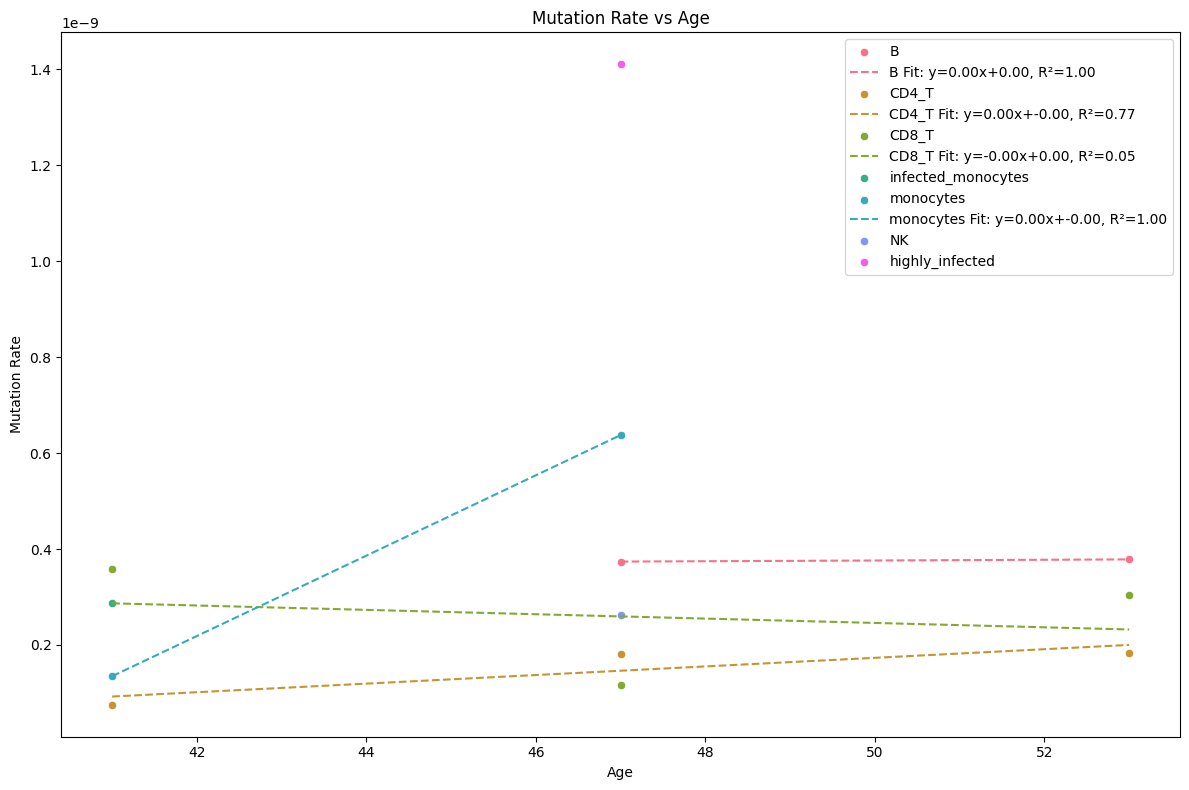

In [64]:
#Plot Graphs
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Ensure the DataFrame has no NaN values in 'age' or 'mutation_rate'
result_filtered_df = result_filtered_df1.dropna(subset=['age', 'mutation_rate'])

# Get unique cell types
cell_types = result_filtered_df['celltype'].unique()

# Define a color palette for cell types
palette = sns.color_palette("husl", len(cell_types))  # Using a distinct color palette

# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot each cell type with different colors
for i, cell_type in enumerate(cell_types):
    cell_subset = result_filtered_df[result_filtered_df['celltype'] == cell_type]
    
    # Check if cell_subset is not empty
    if cell_subset.empty:
        continue
    
    # Plot scatter plot
    sns.scatterplot(x='age', y='mutation_rate', data=cell_subset, color=palette[i], marker='o', label=cell_type)
    
    # Check if there is variation in 'age' values
    if len(cell_subset['age'].unique()) > 1:
        # Fit line of best fit
        slope, intercept, r_value, p_value, std_err = stats.linregress(cell_subset['age'], cell_subset['mutation_rate'])
        
        # Generate line of best fit
        age_range = np.linspace(cell_subset['age'].min(), cell_subset['age'].max(), 100)
        mutation_rate_fit = intercept + slope * age_range
        
        # Plot line of best fit with label
        plt.plot(age_range, mutation_rate_fit, color=palette[i], linestyle='--',
                 label=f'{cell_type} Fit: y={slope:.2f}x+{intercept:.2f}, R²={r_value**2:.2f}')
    else:
        print(f"Not enough variation in 'age' values for cell type: {cell_type}")

# Set titles and labels
plt.title('Mutation Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Mutation Rate')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [66]:
#Create a summary table of the graph

# Ensure the DataFrame has no NaN values in 'age' or 'mutation_rate'
result_filtered_df = result_filtered_df1.dropna(subset=['age', 'mutation_rate'])

# Get unique cell types
cell_types = result_filtered_df['celltype'].unique()

# Prepare lists to hold the summary information
summary_data = {
    'Cell Type': [],
    'Slope': [],
    'Intercept': [],
    'R-squared': [],
    'P-value': [],
    'Std Error': []
}

# Calculate regression parameters for each cell type
for cell_type in cell_types:
    cell_subset = result_filtered_df[result_filtered_df['celltype'] == cell_type]
    
    # Check if there is variation in 'age' values
    if len(cell_subset['age'].unique()) > 1:
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = stats.linregress(cell_subset['age'], cell_subset['mutation_rate'])
        
        # Append the results to the summary data
        summary_data['Cell Type'].append(cell_type)
        summary_data['Slope'].append(slope)
        summary_data['Intercept'].append(intercept)
        summary_data['R-squared'].append(r_value**2)
        summary_data['P-value'].append(p_value)
        summary_data['Std Error'].append(std_err)
    else:
        print(f"Not enough variation in 'age' values for cell type: {cell_type}")
        
# Create a DataFrame from the summary data
summary_df1 = pd.DataFrame(summary_data)

# Display the summary table
summary_df1[['Cell Type', 'Slope', 'Intercept', 'R-squared']]

Not enough variation in 'age' values for cell type: infected_monocytes
Not enough variation in 'age' values for cell type: NK
Not enough variation in 'age' values for cell type: highly_infected


,Cell Type,Slope,Intercept,R-squared
0,B,7.599818e-13,3.381919e-10,1.000000
1,CD4_T,8.969515e-12,-2.752045e-10,0.768874
2,CD8_T,-4.543396e-12,4.731541e-10,0.045717
3,monocytes,8.379408e-11,-3.300624e-09,1.000000
